In [2]:
## Import dependencies
import pandas as pd
from linearmodels import PanelOLS


Per Capita Analysis

In [123]:
data = pd.read_csv("project_data_rates.csv", index_col=0).rename(
    columns={
        "permanent_housing": "permanent_housing_rate",
        "homeless": "homeless_rate",
        "poverty": "poverty_rate",
        "Black or African American": "african_american",
        "American Indian and Alaska Native": "american_indian_n_alaska_native",
        "Asian": "asian",
        "Native Hawaiian and Other Pacific Islander": "pacific_islander",
        "Two or More Races": "multiple_races",
        "Non Hispanic": "non_hispanic",
        "Drug Deaths": "drug_death_rate",
        "Suicide Deaths": "suicide_death_rate",
    }
)
data.head()


,CoC Number,Coc,Year,permanent_housing_rate,homeless_rate,poverty_rate,unemployment_rate,Population,Male,Female,White,african_american,american_indian_n_alaska_native,asian,pacific_islander,multiple_races,non_hispanic,Hispanic,drug_death_rate,suicide_death_rate
0,AZ-502,"Phoenix,Mesa/Maricopa",2007,52.001543,218.127624,98946.775104,3200.0,3872962,50412.475000,49587.525000,87858.904890,4886.079440,2248.950545,3007.620524,231.967161,1766.477440,69301.067245,30698.932755,14.846518,14.665778
1,AZ-502,"Phoenix,Mesa/Maricopa",2008,63.740080,181.620069,98615.857511,5100.0,3958263,50450.159578,49549.840422,87561.084243,5048.527599,2244.696727,3094.817095,236.568414,1814.305922,68666.685362,31333.314638,13.288657,13.642348
2,AZ-502,"Phoenix,Mesa/Maricopa",2009,62.861472,196.091006,98737.277325,8900.0,4023132,50471.871169,49528.128831,87320.152558,5202.364725,2218.719147,3163.182317,240.484279,1855.096974,68167.934833,31832.065167,14.068641,13.024678
3,AZ-502,"Phoenix,Mesa/Maricopa",2010,78.933918,183.358278,98824.767488,9500.0,3817117,49473.594862,50526.405138,85623.940791,5389.722138,2610.949573,3675.155883,264.990567,2435.241047,70429.489062,29570.510938,15.954449,14.775549
4,AZ-502,"Phoenix,Mesa/Maricopa",2011,82.933995,150.463014,98699.221313,8500.0,3875371,49431.628611,50568.371389,85242.470979,5479.423776,2627.387159,3847.347777,266.142261,2537.228049,70307.797628,29692.202372,16.179096,16.024272


In [146]:
mod = PanelOLS.from_formula(
    "homeless_rate ~ 1 + permanent_housing_rate + Population + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate + Female + Hispanic"
    "+ african_american + american_indian_n_alaska_native + asian + pacific_islander + multiple_races" 
    "+ EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit(cov_type='clustered')
mod.summary


Dep. Variable:,homeless_rate,R-squared:,0.2584
Estimator:,PanelOLS,R-squared (Between):,-5.8004
No. Observations:,285,R-squared (Within):,-1.0079
Date:,"Mon, Apr 24 2023",R-squared (Overall):,-4.9346
Time:,21:03:43,Log-likelihood,-1689.7
Cov. Estimator:,Clustered,,
,,F-statistic:,6.4059
Entities:,19,P-value,0.0000
Avg Obs:,15.000,Distribution:,"F(13,239)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,6.9972


In [147]:
test_mod = PanelOLS.from_formula(
    "permanent_housing_rate ~ 1 + EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit(cov_type='clustered')
test_mod.summary

Dep. Variable:,permanent_housing_rate,R-squared:,0.0000
Estimator:,PanelOLS,R-squared (Between):,0.0000
No. Observations:,285,R-squared (Within):,0.0000
Date:,"Mon, Apr 24 2023",R-squared (Overall):,0.0000
Time:,21:04:19,Log-likelihood,-1784.0
Cov. Estimator:,Clustered,,
,,F-statistic:,--
Entities:,19,P-value,--
Avg Obs:,15.000,Distribution:,--
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,--


In [164]:
test_mod = PanelOLS.from_formula(
    "Female ~ 1 + Male",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit(cov_type='clustered')
test_mod.summary

Dep. Variable:,Female,R-squared:,1.0000
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,285,R-squared (Within):,1.0000
Date:,"Tue, Apr 25 2023",R-squared (Overall):,1.0000
Time:,14:52:45,Log-likelihood,6891.0
Cov. Estimator:,Clustered,,
,,F-statistic:,6.36e+30
Entities:,19,P-value,0.0000
Avg Obs:,15.000,Distribution:,"F(1,283)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,5.88e+30


In [149]:
data.loc[:, 'permanent_housing_rate'].describe()

count     285.000000
mean      279.581747
std       340.871202
min         6.085049
25%        90.039045
50%       155.701361
75%       307.150067
max      2485.486158
Name: permanent_housing_rate, dtype: float64

In [163]:
(data.loc[data.loc[:, 'Year'] == 2021, 'permanent_housing_rate'].mean() - data.loc[data.loc[:, 'Year'] == 2007, 'permanent_housing_rate'].mean()) / (2021 - 2007)


18.161157724747593

In [104]:
(data.loc[:, 'Year'] - data.loc[:, 'Year'].shift()).value_counts()

 1.0     266
-14.0     18
Name: Year, dtype: int64

In [117]:
data.loc[:, 'perm_housing_pct_chg'] = data.loc[:, 'permanent_housing_rate'] / data.loc[:, 'permanent_housing_rate'].shift() - 1

In [119]:
data_w_pct_chg = data.set_index(["CoC Number", "Year"]).drop(index = 2007, level = 1)

In [121]:
mod2 = PanelOLS.from_formula(
    "homeless_rate ~ Population + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate + Female + Hispanic + drug_death_rate + suicide_death_rate"
    "+ White + perm_housing_pct_chg + african_american + american_indian_n_alaska_native + asian + pacific_islander + multiple_races" 
    "+ EntityEffects + TimeEffects",
    data=data_w_pct_chg,
    drop_absorbed=True,
).fit(cov_type='clustered')
mod2.summary

Dep. Variable:,homeless_rate,R-squared:,0.2456
Estimator:,PanelOLS,R-squared (Between):,-3.2338
No. Observations:,266,R-squared (Within):,-0.8066
Date:,"Sat, Apr 22 2023",R-squared (Overall):,-2.8707
Time:,17:40:31,Log-likelihood,-1557.3
Cov. Estimator:,Clustered,,
,,F-statistic:,5.5354
Entities:,19,P-value,0.0000
Avg Obs:,14.000,Distribution:,"F(13,221)"
Min Obs:,14.000,,
Max Obs:,14.000,F-statistic (robust):,359.78


In [56]:
mod.resids

CoC Number  Year
AZ-502      2007    -57.506097
            2008    -73.654508
            2009     15.076601
            2010     37.942525
            2011     17.644607
                       ...    
WA-500      2017     52.121776
            2018     60.945251
            2019     -9.248182
            2020    -14.948586
            2021   -181.757666
Name: residual, Length: 285, dtype: float64

In [65]:
data.corr()

C:\Users\nicho\AppData\Local\Temp\ipykernel_28568\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,permanent_housing_rate,homeless_rate,poverty_rate,unemployment_rate,Population,Male,Female,White,african_american,american_indian_n_alaska_native,asian,pacific_islander,multiple_races,non_hispanic,Hispanic,drug_death_rate,suicide_death_rate
Year,1.000000,0.215273,-0.157463,0.044940,-0.102237,0.036546,-0.023645,0.023645,-0.111439,-0.008523,0.160537,0.111121,0.064591,0.458532,-0.069063,0.069063,0.508867,0.110317
permanent_housing_rate,0.215273,1.000000,0.683066,-0.579332,-0.128192,-0.279464,-0.297272,0.297272,-0.539197,0.341193,-0.299962,0.218752,-0.081861,0.167562,0.399893,-0.399893,0.493541,-0.438602
homeless_rate,-0.157463,0.683066,1.000000,-0.481101,0.050777,-0.140101,-0.320818,0.320818,-0.575664,0.363966,-0.339134,0.245654,-0.000419,0.064413,0.405925,-0.405925,0.092520,-0.499405
poverty_rate,0.044940,-0.579332,-0.481101,1.000000,0.189647,0.410623,0.493421,-0.493421,0.396055,-0.490325,0.335988,0.189568,0.260622,0.128079,-0.344979,0.344979,-0.230387,0.398057
unemployment_rate,-0.102237,-0.128192,0.050777,0.189647,1.000000,0.392164,-0.164480,0.164480,0.081546,0.014145,0.114877,-0.123655,-0.184135,-0.167013,-0.065584,0.065584,-0.111447,0.039398
Population,0.036546,-0.279464,-0.140101,0.410623,0.392164,1.000000,-0.089395,0.089395,0.187978,-0.175787,0.342926,0.013182,-0.027188,-0.149604,-0.534686,0.534686,-0.272898,-0.190039
Male,-0.023645,-0.297272,-0.320818,0.493421,-0.164480,-0.089395,1.000000,-1.000000,0.599165,-0.867411,0.344374,0.468610,0.559666,0.451702,-0.375348,0.375348,-0.285403,0.458763
Female,0.023645,0.297272,0.320818,-0.493421,0.164480,0.089395,-1.000000,1.000000,-0.599165,0.867411,-0.344374,-0.468610,-0.559666,-0.451702,0.375348,-0.375348,0.285403,-0.458763
White,-0.111439,-0.539197,-0.575664,0.396055,0.081546,0.187978,0.599165,-0.599165,1.000000,-0.756061,0.579535,-0.252190,0.227629,0.084932,-0.607014,0.607014,-0.329660,0.578403
african_american,-0.008523,0.341193,0.363966,-0.490325,0.014145,-0.175787,-0.867411,0.867411,-0.756061,1.000000,-0.581660,-0.438244,-0.590180,-0.507110,0.560476,-0.560476,0.323356,-0.414047


<AxesSubplot: >

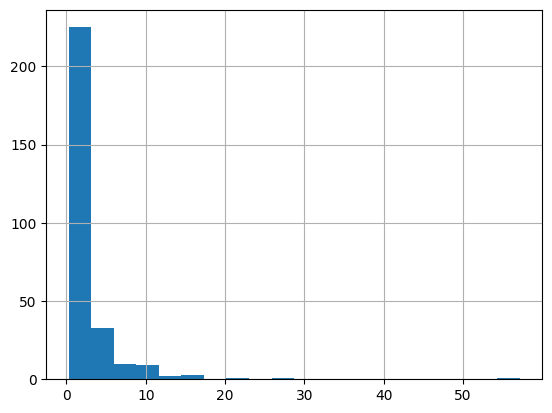

In [77]:
(data.loc[:, 'homeless_rate'] / data.loc[:, 'permanent_housing_rate']).hist(bins = 20)

<AxesSubplot: >

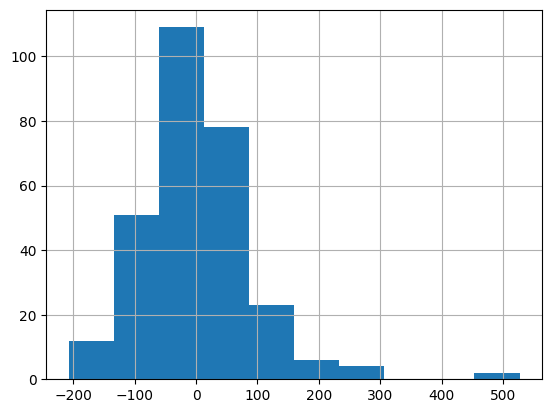

In [67]:
mod.resids.hist()

<AxesSubplot: title={'center': 'Residual Plot'}, xlabel='Female', ylabel='residual'>

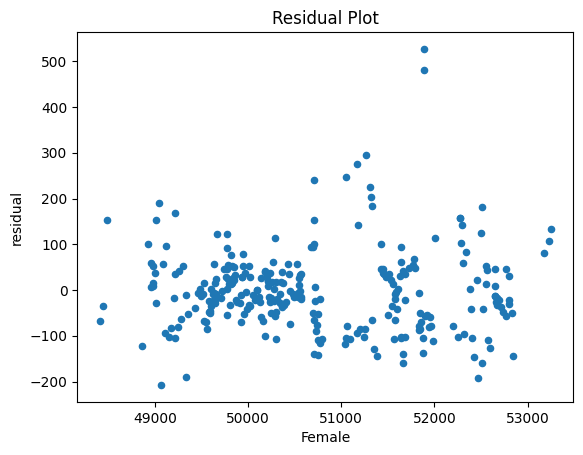

In [78]:
pd.concat((data.set_index(["CoC Number", "Year"]).loc[:, "Female"], mod.resids), axis = 1).rename(columns = {0: 'residuals'}).plot.scatter('Female', 'residual', title = 'Residual Plot')

Text(0.5, 1.0, 'QQ Plot')

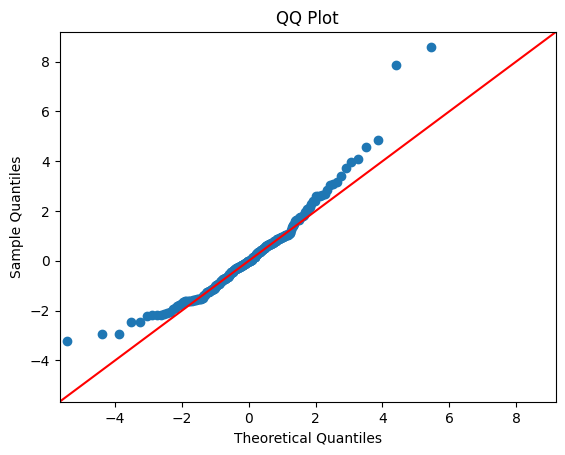

In [80]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

sm.qqplot(mod.resids, stats.t, fit = True, line = "45")
plt.title("QQ Plot")


<AxesSubplot: xlabel='predictions', ylabel='residual'>

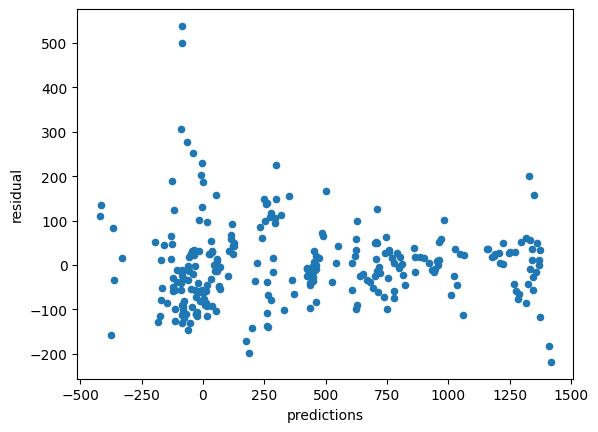

In [59]:
pd.concat((predictions, mod.resids), axis = 1).rename(columns = {0: 'residuals'}).plot.scatter('predictions', 'residual')

In [18]:
mod2 = PanelOLS.from_formula(
    "homeless_rate ~ permanent_housing_rate + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate" 
    "+ Hispanic + non_hispanic" 
    "+ EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit()
mod2.summary


Dep. Variable:,homeless_rate,R-squared:,0.0415
Estimator:,PanelOLS,R-squared (Between):,0.2620
No. Observations:,285,R-squared (Within):,0.1183
Date:,"Sat, Apr 22 2023",R-squared (Overall):,0.2360
Time:,12:07:04,Log-likelihood,-1726.3
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.7743
Entities:,19,P-value,0.1049
Avg Obs:,15.000,Distribution:,"F(6,246)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,9.2920


In [11]:
mod3 = PanelOLS.from_formula(
    "homeless_rate ~ permanent_housing_rate + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate" 
    "+ Female" 
    "+ EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit()
mod3.summary

Dep. Variable:,homeless_rate,R-squared:,0.0903
Estimator:,PanelOLS,R-squared (Between):,-185.49
No. Observations:,285,R-squared (Within):,0.1156
Date:,"Sat, Apr 22 2023",R-squared (Overall):,-174.50
Time:,13:44:04,Log-likelihood,-1718.8
Cov. Estimator:,Unadjusted,,
,,F-statistic:,4.0682
Entities:,19,P-value,0.0007
Avg Obs:,15.000,Distribution:,"F(6,246)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,4.0682


Normalized by 2007 Homeless Populations

Importing Data

In [4]:
data2 = pd.read_csv("project_data.csv", index_col=0)#.rename(
#     columns={
#         "permanent_housing": "permanent_housing_rate",
#         "homeless": "homeless_rate",
#         "poverty": "poverty_rate",
#         "Black or African American": "african_american",
#         "American Indian and Alaska Native": "american_indian_n_alaska_native",
#         "Asian": "asian",
#         "Native Hawaiian and Other Pacific Islander": "pacific_islander",
#         "Two or More Races": "multiple_races",
#         "Non Hispanic": "non_hispanic",
#         "Drug Deaths": "drug_death_rate",
#         "Suicide Deaths": "suicide_death_rate",
#     }
# )
data2.head()


,CoC Number,Coc,Year,permanent_housing,homeless,poverty,unemployment_rate,Population,Male,Female,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Two or More Races,Non Hispanic,Hispanic,Drug Deaths,Suicide Deaths
0,AZ-502,"Phoenix,Mesa/Maricopa",2007,2014.0,8448,3832171.0,3.2,3872962,1952456,1920506,3402742,189236,87101,116484,8984,68415,2684004,1188958,575.0,568.0
1,AZ-502,"Phoenix,Mesa/Maricopa",2008,2523.0,7189,3903475.0,5.1,3958263,1996950,1961313,3465898,199834,88851,122501,9364,71815,2718008,1240255,526.0,540.0
2,AZ-502,"Phoenix,Mesa/Maricopa",2009,2529.0,7889,3972331.0,8.9,4023132,2030550,1992582,3513005,209298,89262,127259,9675,74633,2742486,1280646,566.0,524.0
3,AZ-502,"Phoenix,Mesa/Maricopa",2010,3013.0,6999,3772257.0,9.5,3817117,1888465,1928652,3268366,205732,99663,140285,10115,92956,2688376,1128741,609.0,564.0
4,AZ-502,"Phoenix,Mesa/Maricopa",2011,3214.0,5831,3824961.0,8.5,3875371,1915659,1959712,3303462,212348,101821,149099,10314,98327,2724688,1150683,627.0,621.0


Estimating Unemployed Population to later Normalize by Homeless Population

In [6]:
data2.loc[:, 'Estimated Unemployed Persons'] = data2.loc[:, 'unemployment_rate'] * data2.loc[:, 'Population']

Transforming Data to Get the 2007 Homeless Population for each COC

In [18]:
data2 = data2.merge(
    data2.loc[data2.loc[:, "Year"] == 2007, ["CoC Number", "homeless"]].rename(
        columns={"homeless": "2007 homeless"}
    ),
    how="left",
    on="CoC Number",
    validate="m:1",
)

Normalizing Data by Dividing Each Variable by the COC's 2007 Homeless Population

In [40]:
normalized_data2 = (
    data2.loc[
        :,
        data2.columns[
            ~data2.columns.isin(
                ["CoC Number", "Coc", "Year", "unemployment_rate", "2007 homeless"]
            )
        ],
    ]
    .divide(data2.loc[:, "2007 homeless"], axis=0)
    .rename(columns=lambda x: f"Normalized {x}")
)

In [45]:
normalized_data2 = pd.concat((data2.loc[:, ["CoC Number", "Coc", "Year",]], normalized_data2), axis = 1)

Renaming columns to use with Panel OLS from Formula function

In [52]:
normalized_data2 = normalized_data2.rename(columns = lambda x: x.replace(" ", "_"))

In [53]:
normalized_data2.columns

Index(['CoC_Number', 'Coc', 'Year', 'Normalized_permanent_housing',
       'Normalized_homeless', 'Normalized_poverty', 'Normalized_Population',
       'Normalized_Male', 'Normalized_Female', 'Normalized_White',
       'Normalized_Black_or_African_American',
       'Normalized_American_Indian_and_Alaska_Native', 'Normalized_Asian',
       'Normalized_Native_Hawaiian_and_Other_Pacific_Islander',
       'Normalized_Two_or_More_Races', 'Normalized_Non_Hispanic',
       'Normalized_Hispanic', 'Normalized_Drug_Deaths',
       'Normalized_Suicide_Deaths', 'Normalized_Estimated_Unemployed_Persons'],
      dtype='object')

In [57]:
norm_mod2 = PanelOLS.from_formula(
    "Normalized_homeless ~ 1 + Normalized_permanent_housing + Normalized_poverty + Normalized_Population + Normalized_Female "
    "+ Normalized_Black_or_African_American + Normalized_American_Indian_and_Alaska_Native + Normalized_Asian "
    "+ Normalized_Native_Hawaiian_and_Other_Pacific_Islander + Normalized_Two_or_More_Races + Normalized_Hispanic "
    "+ Normalized_Drug_Deaths + Normalized_Suicide_Deaths + Normalized_Estimated_Unemployed_Persons"
    # + permanent_housing_rate + Population + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate + Female + Hispanic"
    # "+ african_american + american_indian_n_alaska_native + asian + pacific_islander + multiple_races"
    "+ EntityEffects + TimeEffects",
    data=normalized_data2.set_index(["CoC_Number", "Year"]),
    drop_absorbed=True,
).fit(cov_type="clustered")
norm_mod2.summary

Dep. Variable:,Normalized_homeless,R-squared:,0.2512
Estimator:,PanelOLS,R-squared (Between):,-6.0847
No. Observations:,285,R-squared (Within):,0.1312
Date:,"Sat, Apr 29 2023",R-squared (Overall):,-3.9232
Time:,13:14:40,Log-likelihood,111.81
Cov. Estimator:,Clustered,,
,,F-statistic:,6.1687
Entities:,19,P-value,0.0000
Avg Obs:,15.000,Distribution:,"F(13,239)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,6.3744


<AxesSubplot: title={'center': 'Residual Plot'}, xlabel='Normalized_Female', ylabel='residual'>

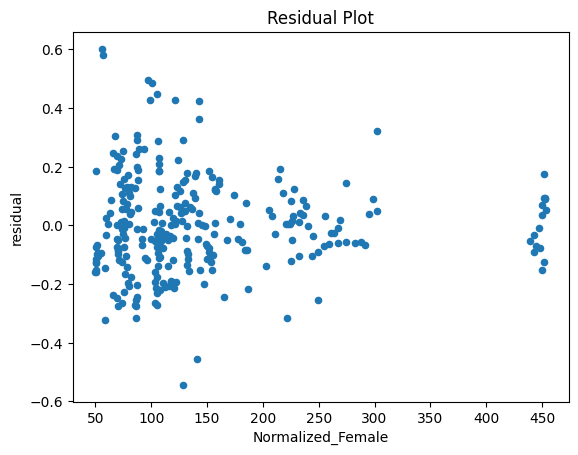

In [64]:
pd.concat((normalized_data2.set_index(["CoC_Number", "Year"]).loc[:, "Normalized_Female"], norm_mod2.resids), axis = 1).plot.scatter('Normalized_Female', 'residual', title = 'Residual Plot')